# Data Wrangling Template

In [1]:
#import libraries for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import json

## Gather

In [2]:
#import csv file

archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#download file programatically

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [4]:
#create a folder to save file in

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
#save downloaded file in new folder

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [6]:
#store file in a Pandas DataFrame

images = pd.read_table('image_predictions/image-predictions.tsv',
                       sep='\t')

In [7]:
# This is the code required to download the 
# website data in JSON form to a .TXT file:

#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'bnBREkOtxBpEPdRAzOoKgdnOl'
#consumer_secret = 'XLbu8SoTJCbMheNvddMYj9NxnWUiEiBRW1HFwCNbmgD4xsvyfD'
#access_token = '1287848994375376898-AfM6AMqbzYtwaTVCmS1bOiUiPowmwT'
#access_secret = 'GxGqDX5zplr70mye96tOVGeRWI1EfY7f2L2lPOrvHTMaZ'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
 #   for tweet_id in tweet_ids:
  #      count += 1
   #     print(str(count) + ": " + str(tweet_id))
    #    try:
     #       tweet = api.get_status(tweet_id, tweet_mode='extended')
      #      print("Success")
       #     json.dump(tweet._json, outfile)
        #    outfile.write('\n')
        #except tweepy.TweepError as e:
         #   print("Fail")
          #  fails_dict[tweet_id] = e
           # pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [8]:
# this is the code I used to pull the required data from the JSON file and store it in a Pandas dataframe:

api_data = []
with open('tweet_json.txt', 'r', encoding = 'utf8') as file:
    for line in file:
        tweet = json.loads(line)
        api_data.append({
            'tweet_id': tweet['id'],
            'retweets': tweet['retweet_count'],
            'favorite_count': tweet['favorite_count'],
        })

api_df = pd.DataFrame(api_data)

## Assess

#### View Archive Data Visually

In [9]:

archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### View Archive Data Programatically

In [10]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
Daisy          7
Bailey         7
an             7
Toby           7
Koda           6
Oscar          6
Rusty          6
Scout          6
Jack           6
Dave           6
Bella          6
Jax            6
Leo            6
Stanley        6
Milo           6
Oakley         5
            ... 
Orion          1
Charleson      1
Sweet          1
Beebop         1
Arya           1
Livvie         1
Pancake        1
Ralph          1
Jay            1
Spark          1
Florence       1
Shawwn         1
Kayla          1
Heinrich       1
Linus          1
Bloo           1
Blu            1
Huxley         1
Mimosa         1
Remus          1
Scott          1
River          1
Obie           1
Stella         1
Glacier        1
Cermet         1
Rueben         1
Eriq          

In [14]:
np.sort(archive.name.unique())

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

In [15]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### View Images Data Visually

In [16]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### View Images Data Programatically

In [17]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### View API Data Visually

In [18]:
api_df

,favorite_count,retweets,tweet_id
0,35786,7568,892420643555336193
1,30901,5607,892177421306343426
2,23248,3714,891815181378084864
3,39072,7754,891689557279858688
4,37322,8346,891327558926688256
5,18813,2803,891087950875897856
6,10925,1820,890971913173991426
7,60290,16935,890729181411237888
8,25874,3855,890609185150312448
9,29540,6589,890240255349198849


#### View API Data Programatically

In [19]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
retweets          2331 non-null int64
tweet_id          2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


#### Tidiness Issues:

1. Merge 3 DataFrames.
2. Drop unnecessary columns.
3. Combine "doggo, fluffer, pupper, and puppo" columns.

#### Cleanliness Issues:

1. Delete retweets. 
2. Timestap column in archive dataset needs to be changed to a datetime data type.
3. Some of the animals listed in the p_1, p_2, and p_3 columns are not dogs.
4. Denominator values in the archives dataset are not all 10.
5. Dog names of "a", "an", "the", etc.
6. Change tweet_id to a string instead of an integer.
7. Some numerator values appear to be off.  
8. Change the tweet_id data type to a string.

## Clean

#### Define
##### Tidiness Issue #1: Merge 3 DataFrames


To start cleaning the data, I will first merge the 3 datasets on the "twitter_id" column. I will make copies of each DataFrame, and I will then merge them into one copy that will be used for cleaning.

#### Code

In [20]:
# creating copies of each DataFrame

archive_clean = archive.copy()
images_clean = images.copy()
api_df_clean = api_df.copy()

In [21]:
# merge 3 copies into 1 on "twitter_id" column
# used the following code from stack overflow:
# https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes/44338256

from functools import reduce
data_frames = [archive_clean, images_clean, api_df_clean]
df_clean = reduce(lambda left,right: pd.merge(left,right,on = ['tweet_id']), data_frames)

#### Test

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
jpg_url                       2059 

This new DataFrame has 30 columns which means that all of the columns in each DataFrame are now combined into one DataFrame.  There are less rows in this DataFrame because the code used does not fill in null values, but that is ok since the dataset is large enough without these values.

#### Define
##### Tidiness Issue #2: Drop unnecessary columns


I will be dropping following columns due to insufficient data:

1. in_reply_to_status_id
2. in_reply_to_user_id

#### Code

In [23]:
# dropping columns using the following stack overflow article as a guide:
# https://stackoverflow.com/questions/51167612/what-is-the-best-way-to-remove-columns-in-pandas
 
df_clean = df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1)

#### Test

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 28 columns):
tweet_id                      2059 non-null int64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
p1                            2059

The columns listed above no longer appear in the DataFrame.

#### Define
##### Tidiness Issue #3: Combine "doggo, fluffer, pupper, and puppo" columns


The project motivation mentioned that each tweet's text was used to extract the dog "stage" of doggo, puppo, pupper, and floofer, but the project motivation mentioned that it was not done well. I will extract the different dog "stages" programatically from the text. Looking at the "Dogtionary" I see the following dog "stages" that I will extract the following 6 dog "stages" from the text:

1. Doggo
2. Pupper
3. Puppo
4. Blep
5. Snoot
6. Floof

In [25]:
#looking at the different dog stages in the original dataset

stages = ['floofer', 'doggo', 'pupper', 'puppo']
for stage in stages:
    print(df_clean[stage].value_counts())

None       2051
floofer       8
Name: floofer, dtype: int64
None     1981
doggo      78
Name: doggo, dtype: int64
None      1838
pupper     221
Name: pupper, dtype: int64
None     2035
puppo      24
Name: puppo, dtype: int64



#### Code

In [26]:
# extract create a new column called "dog_stage" 
#https://stackoverflow.com/questions/46921465/extract-substring-from-text-in-a-pandas-dataframe-as-new-column

import re
word_list = ['floof', 'puppo', 'doggo', 'blep', 'snoot', 'pupper']
df_clean['dog_stage'] = df_clean.text.str.extract('({})'.format('|'.join(word_list)), 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna('')

#### Test

In [27]:
#checking to see that the new column was added

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 29 columns):
tweet_id                      2059 non-null int64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
p1                            2059

In [28]:
#checking the different values in the new columns

df_clean.dog_stage.value_counts()

          1675
pupper     238
doggo       78
floof       36
puppo       29
blep         3
Name: dog_stage, dtype: int64

In [29]:
#checking to see that different variations of each word were added to the new column

df_clean.query('dog_stage == "floof"')

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweets,dog_stage
24,887101392804085760,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,...,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True,28422,5360,floof
41,883360690899218434,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,...,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True,21047,3324,floof
48,881906580714921986,2017-07-03 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rey. He's a Benebop Cumberfloof. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881906580...,12,10,...,True,Chesapeake_Bay_retriever,0.278966,True,koala,0.127017,False,22580,3057,floof
336,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,...,True,kuvasz,0.059526,True,Samoyed,0.037400,True,12251,3228,floof
459,800388270626521089,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,...,True,Pembroke,0.194207,True,collie,0.154603,True,11242,2836,floof
487,796080075804475393,2016-11-08 20:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Yogi. He's 98% floof. Snuggable af. 12...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796080075...,12,10,...,True,Tibetan_mastiff,0.014110,True,gibbon,0.002358,False,8539,2327,floof
495,794332329137291264,2016-11-04 00:15:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nimbus (like the cloud). He just bough...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794332329...,12,10,...,True,malamute,0.004906,True,Great_Pyrenees,0.002901,True,9673,2707,floof
586,780543529827336192,2016-09-26 23:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a perturbed super floof. 12/10 would sn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780543529...,12,10,...,True,Labrador_retriever,0.317365,True,Tibetan_mastiff,0.012260,True,6319,1748,floof
590,780192070812196864,2016-09-25 23:47:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780192070...,11,10,...,True,mongoose,0.091474,False,hatchet,0.073545,False,8729,2242,floof
606,777641927919427584,2016-09-18 22:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Arnie. He's a Nova Scot...,7.504293e+17,4.196984e+09,2016-07-05 20:41:01 +0000,https://twitter.com/dog_rates/status/750429297...,12,10,...,True,Labrador_retriever,0.011584,True,refrigerator,0.007499,False,0,4228,floof


Looking at the sample for "floof" above, you can see that for a few of the users, different variations of "floof" were used, and this codes extracts them all.  

In [30]:
#drop old dog stage columns

df_clean = df_clean.drop(['doggo', 'floofer', 'puppo', 'pupper'], axis = 1)

In [31]:
#testing to see that the columns were dropped

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 25 columns):
tweet_id                      2059 non-null int64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
p1                            2059 non-null object
p1_conf                       2059 non-null float64
p1_dog                        2059 non-null bool
p2                            2059 non-null object
p2_conf                       2059 

In [32]:
#looking at the values in the new column

np.sort(df_clean.dog_stage.unique())

array(['', 'blep', 'doggo', 'floof', 'pupper', 'puppo'], dtype=object)

In [33]:
#looking at the value counts in the new columns

df_clean.dog_stage.value_counts()

          1675
pupper     238
doggo       78
floof       36
puppo       29
blep         3
Name: dog_stage, dtype: int64

In [34]:
#assigning the string value of "None" to the 1675 blank values

df_clean['dog_stage'] = df_clean.dog_stage.replace("", 'none')

In [35]:
#testing that the above cell worked

df_clean.dog_stage.value_counts()

none      1675
pupper     238
doggo       78
floof       36
puppo       29
blep         3
Name: dog_stage, dtype: int64

#### Define
##### Cleanliness Issue #1: Delete retweets

I will delete the rows that have values in the "retweeted_status_id" column since this indicates a retweet.  I will also delete the "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp" columns since they will not be used after this step

#### Code

In [36]:
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]
df_clean = df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 22 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
jpg_url               1987 non-null object
img_num               1987 non-null int64
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog                1987 non-null bool
favorite_count        1987 non-null int64
retweets              1987 non-null int64

#### Define
##### Cleanliness Issue #2: Timestap column needs to be changed to a datetime data type


The timestamp column is listed as an object meaning it is currently recognized as a string.  The values in this column need to be changed to the datetime data type. 

#### Code

In [38]:
#code to convert the timestamp column to a datetime

df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#### Test

In [39]:
#verifying that it converted

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 22 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null datetime64[ns]
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
jpg_url               1987 non-null object
img_num               1987 non-null int64
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog                1987 non-null bool
favorite_count        1987 non-null int64
retweets              1987 non-nu

#### Define
##### Cleanliness Issue #3: Create a column for the ratio of the ratings numerator to the denominator

Due to the project motivation's statement that the ratings were not well extracted, I will re-extract the ratings from the text.  Two of the large denominators and two denominators less than 10 will be changed manually since they are still not fixed by re-extracting the text.  I will then create a column with a ratio of the numerator to the denominator because large denominators are due to there being multiple dogs in a picture.

#### Code

In [40]:
#here we can see that some of denominators with values > 10 are mutliples of 10.
#by viewing the jpg file, you can see that there are multiple dogs in these pictures
# we also see 2 denominator values that are equal to 11

df_clean[df_clean['rating_denominator'] > 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweets,dog_stage
336,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,...,True,kuvasz,0.059526,True,Samoyed,0.037400,True,12251,3228,floof
722,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,...,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,4756,2190,none
863,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,...,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,34524,13087,none
911,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,...,False,breakwater,0.051351,False,king_penguin,0.049444,False,3766,1242,doggo
954,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,...,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,4020,1529,none
988,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,...,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,2334,203,none
1009,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,...,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,2777,723,pupper
1034,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,...,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,2263,546,pupper
1052,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,...,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,2395,631,none
1118,704054845121142784,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,a,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,...,True,kuvasz,0.228764,True,golden_retriever,0.043885,True,2873,897,pupper


In [41]:
#here we see 2 denominator values less than 10

df_clean[df_clean['rating_denominator'] < 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweets,dog_stage
406,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,...,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,5372,1448,none
2038,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,...,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,134,59,none


In [42]:
#this is the code used to re-extract the values
#it creates a new DataFrame that was then added to the df_clean DataFrame
#each column was then converted to a float
#used code from here to help: https://github.com/wrayz/udacity-wrangle-and-analyze-data/blob/master/wrangle_act.ipynb

ratings = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
df_clean['numerator'] = ratings[0]
df_clean['denominator'] = ratings[1]
df_clean['numerator'] = df_clean.numerator.astype(float)
df_clean['denominator'] = df_clean.denominator.astype(float)

In [43]:
#we can see that the 4 denominator values were not corrected with this code

df_clean.denominator.value_counts()

10.0     1969
50.0        3
80.0        2
11.0        2
130.0       1
170.0       1
150.0       1
2.0         1
120.0       1
110.0       1
40.0        1
90.0        1
20.0        1
7.0         1
70.0        1
Name: denominator, dtype: int64

In [44]:
#code used to view the index of the values  10

df_clean.loc[(df_clean['denominator'] < 10)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweets,dog_stage,numerator,denominator
406,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,...,0.036708,True,Labrador_retriever,0.025823,True,5372,1448,none,24.0,7.0
2038,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,...,0.063064,True,miniature_poodle,0.025581,True,134,59,none,1.0,2.0


In [45]:
#code used to view the index of the values == 11

df_clean.loc[df_clean['denominator'] == 11]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweets,dog_stage,numerator,denominator
863,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,...,0.101286,True,Labrador_retriever,0.023785,True,34524,13087,none,9.0,11.0
1392,682962037429899265,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,...,0.155207,True,loupe,0.153598,False,36176,16172,none,7.0,11.0


In [46]:
#code used to view the text for the 4 tweets with bad denominator values

dogs = [406, 2038, 863, 1392]
for dog in dogs:
    print(df_clean.text.loc[dog])

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5


In [47]:
#here is the code used to manually override the last 4 values
# we can drop Sam because he does not have a rating

dogs = [2038, 863, 1392]
for dog in dogs:
    df_clean.denominator.loc[dog] = 10
df_clean.numerator.loc[2038] = 9
df_clean.numerator.loc[2038] = 14
df_clean.numerator.loc[2038] = 10

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [48]:
#dropping Sam because he does not have a rating

df_clean = df_clean[df_clean['denominator'] != 7]

In [49]:
#drop old rating_numerator and rating_denominator columns

df_clean = df_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1)

In [50]:
#create a ratio column

df_clean['ratio'] = df_clean['numerator']/df_clean['denominator']

#### Test

In [51]:
df_clean.denominator.value_counts()

10.0     1972
50.0        3
80.0        2
130.0       1
150.0       1
120.0       1
110.0       1
40.0        1
90.0        1
20.0        1
170.0       1
70.0        1
Name: denominator, dtype: int64

In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2058
Data columns (total 23 columns):
tweet_id          1986 non-null int64
timestamp         1986 non-null datetime64[ns]
source            1986 non-null object
text              1986 non-null object
expanded_urls     1986 non-null object
name              1986 non-null object
jpg_url           1986 non-null object
img_num           1986 non-null int64
p1                1986 non-null object
p1_conf           1986 non-null float64
p1_dog            1986 non-null bool
p2                1986 non-null object
p2_conf           1986 non-null float64
p2_dog            1986 non-null bool
p3                1986 non-null object
p3_conf           1986 non-null float64
p3_dog            1986 non-null bool
favorite_count    1986 non-null int64
retweets          1986 non-null int64
dog_stage         1986 non-null object
numerator         1986 non-null float64
denominator       1986 non-null float64
ratio             1986 non-null 

#### Define
##### Cleanliness Issue #4: Inconsistent case for breed name and "_" symbol in images dataset

The breed names in the p1 column are split between upper case and lower case values, and they are also split with spaces and "_" symbols between them.  I will standardize this column.  I will only use the p1 column for this, and I will drop other columns.  Ideally, I would like to create a column that displays the dog breed with the highest of the 3 probabilities, but I could not figure out how to do that.

#### Code

In [53]:
#code to drop the p2 and p3 columns

df_clean = df_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

In [54]:
#code to create a lowercase value for dog breed

df_clean['p1'] = df_clean['p1'].str.lower()

In [55]:
#code to replace "_" character with a space

df_clean['p1'] = df_clean['p1'].str.replace(r"_", " ", regex = True)

#### Test

In [56]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2058
Data columns (total 17 columns):
tweet_id          1986 non-null int64
timestamp         1986 non-null datetime64[ns]
source            1986 non-null object
text              1986 non-null object
expanded_urls     1986 non-null object
name              1986 non-null object
jpg_url           1986 non-null object
img_num           1986 non-null int64
p1                1986 non-null object
p1_conf           1986 non-null float64
p1_dog            1986 non-null bool
favorite_count    1986 non-null int64
retweets          1986 non-null int64
dog_stage         1986 non-null object
numerator         1986 non-null float64
denominator       1986 non-null float64
ratio             1986 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(4), int64(4), object(7)
memory usage: 265.7+ KB


In [57]:
df_clean.p1.value_counts()

golden retriever             138
labrador retriever            93
pembroke                      88
chihuahua                     79
pug                           54
chow                          41
samoyed                       39
pomeranian                    38
toy poodle                    37
malamute                      29
cocker spaniel                27
french bulldog                25
chesapeake bay retriever      23
miniature pinscher            22
seat belt                     21
siberian husky                20
german shepherd               20
teddy                         18
eskimo dog                    18
maltese dog                   18
staffordshire bullterrier     18
shetland sheepdog             18
cardigan                      17
beagle                        17
shih-tzu                      17
rottweiler                    17
lakeland terrier              16
italian greyhound             16
kuvasz                        16
web site                      15
          

In [58]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweets,dog_stage,numerator,denominator,ratio
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,35786,7568,none,13.0,10.0,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,30901,5607,none,13.0,10.0,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,23248,3714,none,12.0,10.0,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.170278,False,39072,7754,none,13.0,10.0,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,37322,8346,none,12.0,10.0,1.2


#### Define
##### Cleanliness Issue #5: Dog names of "a", "an", "the", etc.

We saw in the assess phase that the lower case names are not actually names, so we will be replacing these values.

#### Code

In [59]:
wrong_names = ['a', 'actually', 'all', 'an', 'by', 'getting', 'his',
       'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my',
       'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the',
       'this', 'unacceptable', 'very']
for name in wrong_names:
    df_clean['name'] = df_clean['name'].replace(name, None)

#### Test

In [60]:
df_clean.name.value_counts()

None              584
Oliver             12
Charlie            10
Cooper             10
Penny               9
Tucker              9
Lucy                9
Daisy               8
Sadie               8
Winston             8
Lola                7
Toby                7
Stanley             7
Bella               6
Koda                6
Bo                  6
Louis               6
Jax                 6
Buddy               5
Leo                 5
Gary                5
Rusty               5
Oscar               5
Chester             5
Scout               5
Walter              5
Milo                5
Bentley             5
Dave                5
Bailey              5
                 ... 
Heinrich            1
Bloo                1
Marty               1
Blu                 1
Mimosa              1
Remus               1
Carbon              1
Maxwell             1
Naphaniel           1
Tito                1
Major               1
Rizzo               1
Darla               1
Devón               1
Sage      

In [61]:
np.sort(df_clean.name.unique())

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava', 'Axel',
       'Bailey', 'Baloo', 'Banditt', 'Banjo', 'Barclay', 'Barney', 'Baron',
       'Batdog', 'Bauer', 'Baxter', 'Bayley', 'BeBe', 'Bear', 'Beau',
       'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella', 'Belle', 'Ben',
       'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb', 'Berkeley',
       'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya', 'Biden', 'Bilbo',
       'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick', 'Blakely', 'Blanket',
       'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu', 'Blue', 'Bluebert',
       

#### Define
##### Cleanliness Issue #6: Clean the source column to identify the device used

I want to extract the device from the http code in the source column. 

#### Code

In [62]:
#code used to extract the device and change it to a categorical data type
#https://github.com/StefaniePowazny/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb

df_clean['source'] = df_clean['source'].str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', 
                                                                       expand = True)[4];
df_clean['source'] = df_clean['source'].astype('category')

#### Test

In [63]:
df_clean.source.value_counts()

Twitter for iPhone    1948
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

#### Define
##### Cleanliness Issue #7: Extract month from timestamp column

I want to add a column for the month of each tweet to see if there are any trends. 

#### Code

In [64]:
#code used to extract the month from each timestamp and add it to a new column
#convert month to categorical data type
#https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas

df_clean['month'] = pd.DatetimeIndex(df_clean['timestamp']).month
df_clean['month'] = df_clean.month.astype('category')

#### Test

In [65]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2058
Data columns (total 18 columns):
tweet_id          1986 non-null int64
timestamp         1986 non-null datetime64[ns]
source            1986 non-null category
text              1986 non-null object
expanded_urls     1986 non-null object
name              1986 non-null object
jpg_url           1986 non-null object
img_num           1986 non-null int64
p1                1986 non-null object
p1_conf           1986 non-null float64
p1_dog            1986 non-null bool
favorite_count    1986 non-null int64
retweets          1986 non-null int64
dog_stage         1986 non-null object
numerator         1986 non-null float64
denominator       1986 non-null float64
ratio             1986 non-null float64
month             1986 non-null category
dtypes: bool(1), category(2), datetime64[ns](1), float64(4), int64(4), object(6)
memory usage: 254.6+ KB



#### Define
##### Cleanliness Issue #8: Change the tweet_id data type to a string

I will be changing the tweet_id column values to a string data type.

#### Code

In [66]:
df_clean['tweet_id'] = df_clean.tweet_id.astype(str)

#### Test

In [67]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2058
Data columns (total 18 columns):
tweet_id          1986 non-null object
timestamp         1986 non-null datetime64[ns]
source            1986 non-null category
text              1986 non-null object
expanded_urls     1986 non-null object
name              1986 non-null object
jpg_url           1986 non-null object
img_num           1986 non-null int64
p1                1986 non-null object
p1_conf           1986 non-null float64
p1_dog            1986 non-null bool
favorite_count    1986 non-null int64
retweets          1986 non-null int64
dog_stage         1986 non-null object
numerator         1986 non-null float64
denominator       1986 non-null float64
ratio             1986 non-null float64
month             1986 non-null category
dtypes: bool(1), category(2), datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 254.6+ KB


## Storing and Analyzing

#### Storing

In [68]:
df_clean.to_csv('df_clean.csv')

##### Descriptive Statistics

In [78]:
df_clean.describe()

,img_num,p1_conf,favorite_count,retweets,numerator,denominator,ratio
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,1.203424,0.593177,8179.125881,2417.440584,12.235539,10.538771,1.163836
std,0.561492,0.271956,12046.000424,4325.191726,41.553063,7.332462,4.072127
min,1.000000,0.044333,70.000000,11.000000,0.000000,10.000000,0.000000
25%,1.000000,0.360998,1746.750000,540.000000,10.000000,10.000000,1.000000
50%,1.000000,0.587222,3677.500000,1171.500000,11.000000,10.000000,1.100000
75%,1.000000,0.843883,10160.750000,2754.500000,12.000000,10.000000,1.200000
max,4.000000,1.000000,154210.000000,76476.000000,1776.000000,170.000000,177.600000


##### Dog Stage Distribution

Text(0.5,0,'Dog Stage')

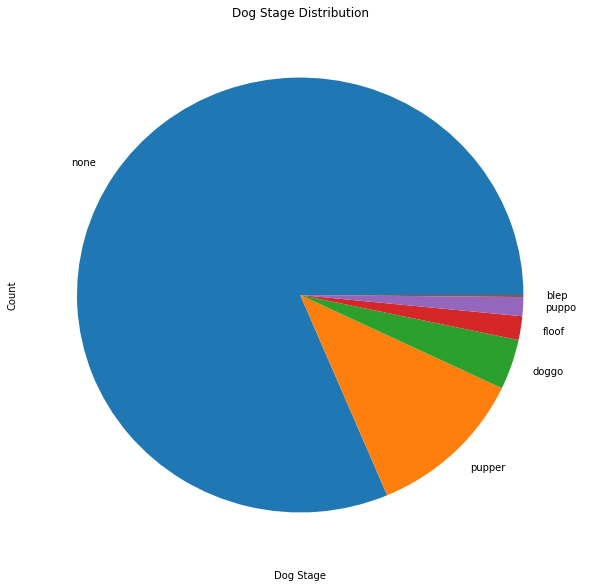

In [70]:
df_clean.dog_stage.value_counts().plot(kind = 'pie', figsize=(10,10))
plt.title('Dog Stage Distribution')
plt.ylabel('Count')
plt.xlabel('Dog Stage')

This bar chart shows the distribution of the different dog stages.  An overwhelming majority of the tweets do not include a dog stage.

##### Correlation Matrix

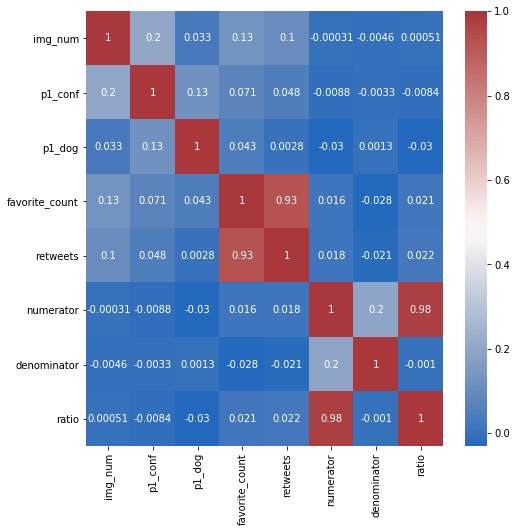

In [79]:
#how to make a heatmap bigger: https://www.kite.com/python/answers/how-to-change-the-seaborn-plot-figure-size-in-python#:~:text=Set%20the%20figsize%20argument%20in,pyplot.&text=subplots(figsize%3DNone)%20with,to%20change%20the%20figure%20size.

fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df_clean.corr(), annot = True, cmap = 'vlag', ax = ax)

We can see above that most of the variables have very low correlation.  The exception to this are the retweet and favorite_count variables.  It appears that the they are highly correlated.

##### Distribution of Favorites and Retweets

Text(0,0.5,'Count')

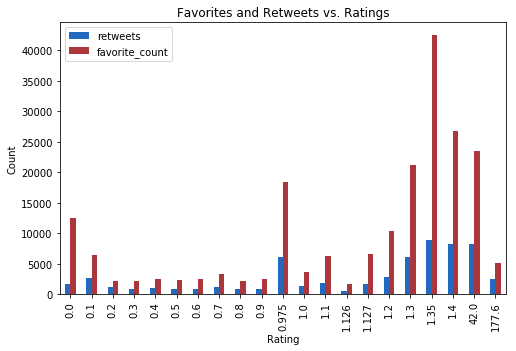

In [72]:
df_clean.groupby('ratio')['retweets','favorite_count',].mean().plot(kind='bar', cmap = 'vlag', figsize=(8,5))
plt.title('Favorites and Retweets vs. Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

##### Favorite Dog

In [73]:
df_clean.loc[df_clean.favorite_count.idxmax()]

tweet_id                                         744234799360020481
timestamp                                       2016-06-18 18:26:18
source                                           Twitter for iPhone
text              Here's a doggo realizing you can stand in a po...
expanded_urls     https://twitter.com/dog_rates/status/744234799...
name                                                           None
jpg_url           https://pbs.twimg.com/ext_tw_video_thumb/74423...
img_num                                                           1
p1                                               labrador retriever
p1_conf                                                    0.825333
p1_dog                                                         True
favorite_count                                               154210
retweets                                                      76476
dog_stage                                                     doggo
numerator                                       

In [74]:
print(df_clean['jpg_url'].loc[838])

https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg


In [75]:
import IPython

IPython.display.HTML('<img src="https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg?raw=1">') 

In [76]:
df_clean.loc[df_clean.numerator.idxmax()]

tweet_id                                         749981277374128128
timestamp                                       2016-07-04 15:00:45
source                                                    TweetDeck
text              This is Atticus. He's quite simply America af....
expanded_urls     https://twitter.com/dog_rates/status/749981277...
name                                                        Atticus
jpg_url             https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
img_num                                                           1
p1                                                          bow tie
p1_conf                                                    0.533941
p1_dog                                                        False
favorite_count                                                 5080
retweets                                                       2430
dog_stage                                                      none
numerator                                       

In [77]:
import IPython

IPython.display.HTML('<img src="https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg?raw=1">') 